In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-white")

<IPython.core.display.Javascript object>


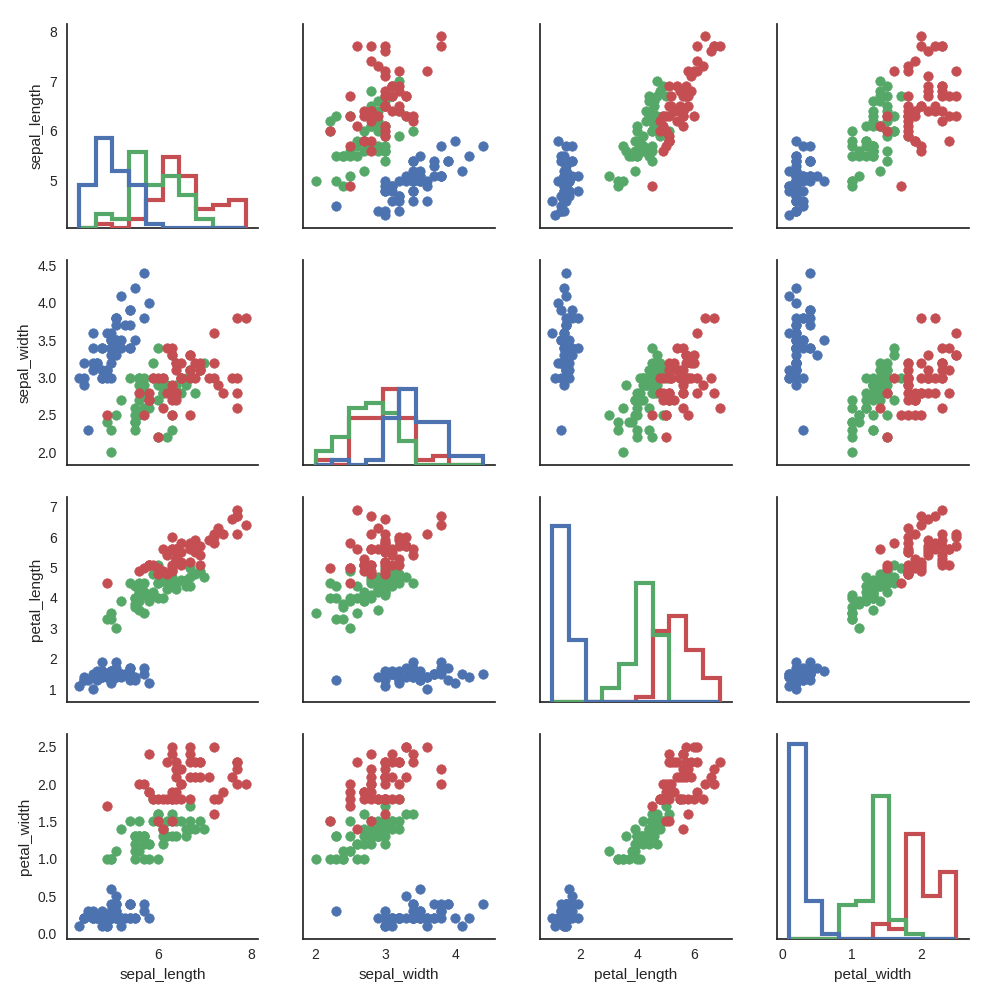

In [17]:
iris = sns.load_dataset("iris")
#g = sns.pairplot(iris, hue="species")
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
#g = g.add_legend()

In [4]:
import scipy.stats
y = np.random.laplace(size=4000)
y += np.sin(y)
x = np.linspace(y.min(), y.max(), num=500)

<IPython.core.display.Javascript object>


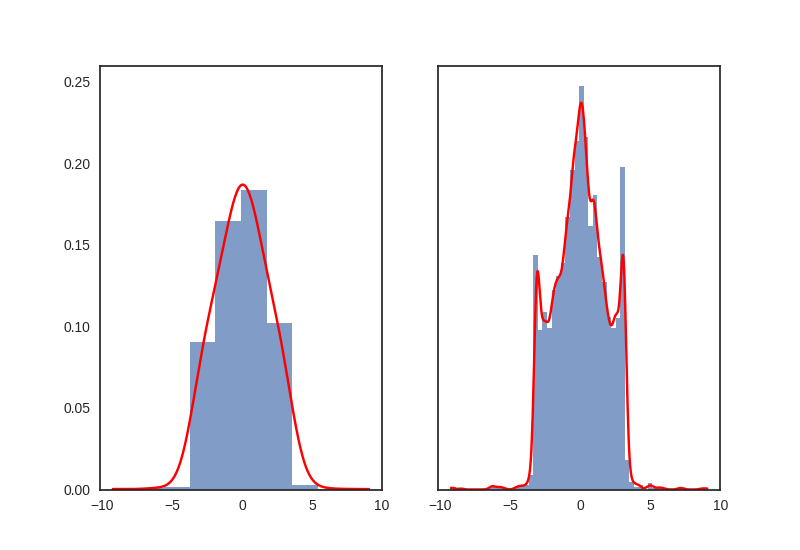

In [14]:
fig, axarr = plt.subplots(1, 2, sharey=True, sharex=True)

#gkm = ["scott", "silverman"]
gkm = [0.5, 0.1]
gk = [scipy.stats.gaussian_kde(y, bw_method=gki) for gki in gkm]

bkm=[None, "fd"]
plt.style.use("seaborn-white")
for ax, gki, bk in zip(axarr, gk, bkm):
    ax.hist(y, normed=True, bins=bk, alpha=0.7)
    ax.plot(y, y*0, "|", color="black")
    ax.plot(x, gki(x), color="r")

<IPython.core.display.Javascript object>


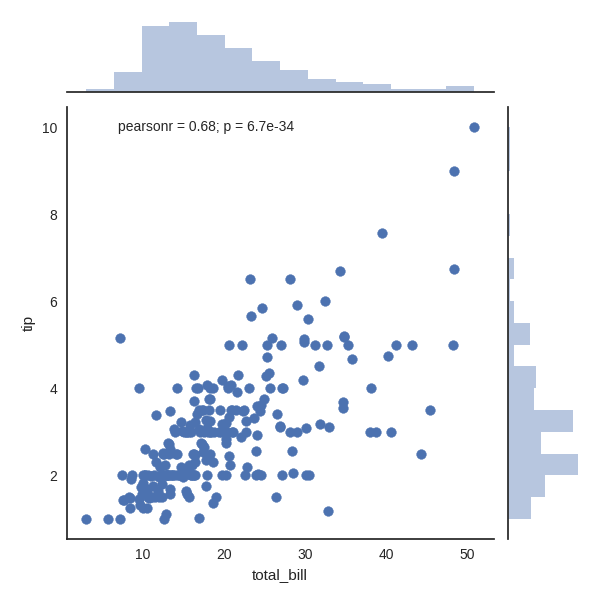

In [6]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

<IPython.core.display.Javascript object>


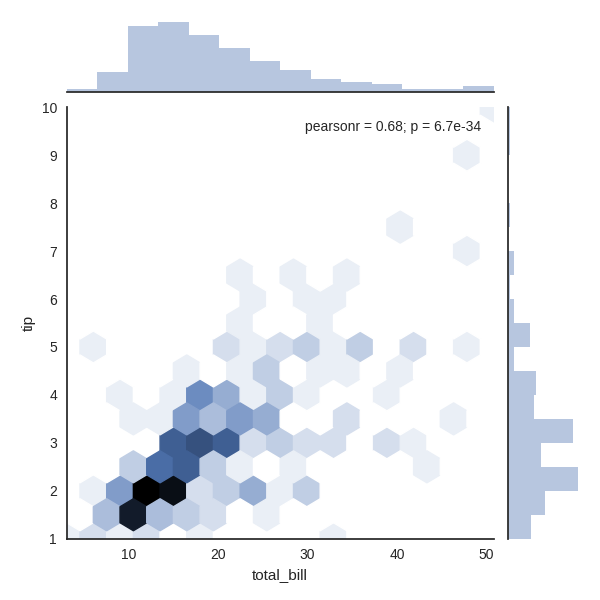

In [7]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

<IPython.core.display.Javascript object>


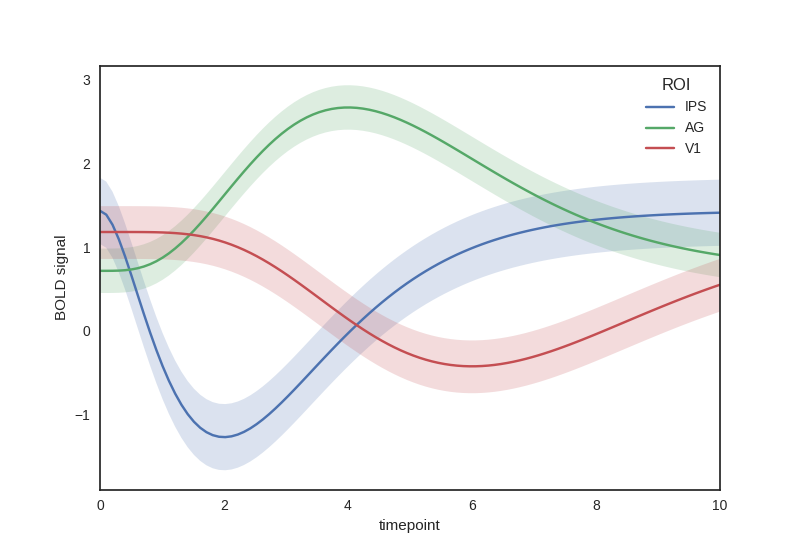

In [8]:
gammas = sns.load_dataset("gammas")
fig, ax = plt.subplots()
ax = sns.tsplot(time="timepoint", value="BOLD signal",unit="subject", condition="ROI",data=gammas)

<IPython.core.display.Javascript object>


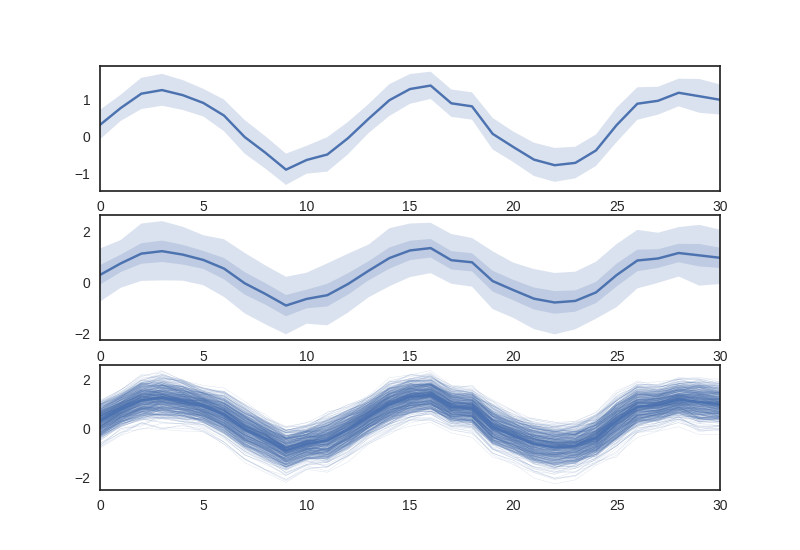

In [9]:
x_ = np.linspace(0, 15, 31)
data = np.sin(x_) + np.random.rand(10, 31) + np.random.randn(10, 1)
fig, ax = plt.subplots(3,1)
sns.tsplot(data=data, ax=ax[0])
sns.tsplot(data=data, ax=ax[1], ci=[66,99])
sns.tsplot(data=data, ax=ax[2], err_style="boot_traces", n_boot=500)

<IPython.core.display.Javascript object>


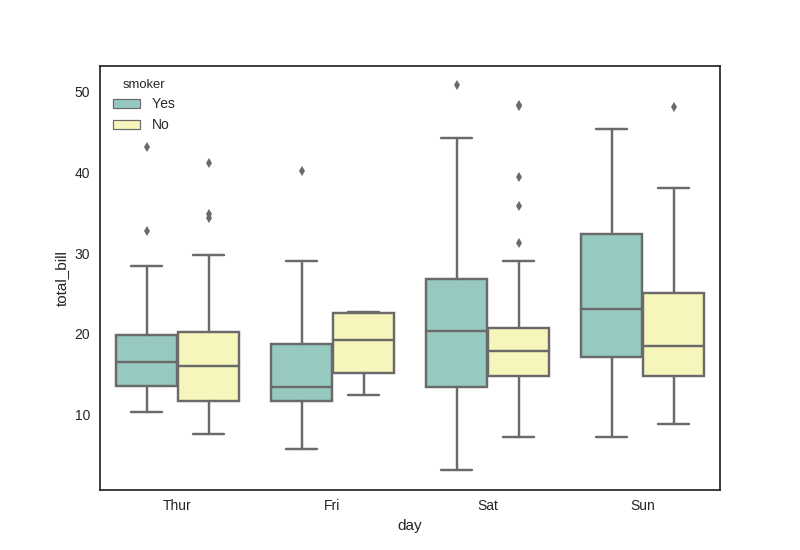

In [10]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3")